### Es 1
Hai a disposizione un file `data.csv` contenente dati mensili di passeggeri con due colonne:

- `date`: data in formato `YYYY-MM` (mese/anno)
- `passengers`: numero di passeggeri per quel mese


Costruisci un modello di **regressione polinomiale** che approssima l’andamento del numero di passeggeri nel tempo.

1. Carica il dataset.
2. Convertilo in un formato numerico utilizzando una colonna `mese_numerico` che conti i mesi a partire da gennaio 1949.
3. Applica una regressione polinomiale (grado a tua scelta).
4. Calcola l’RMSE tra i valori reali e quelli predetti.
5. Visualizza i dati reali e la curva stimata con Plotly.

In [3]:
%conda install sklearn

Channels:
 - defaults
 - conda-forge
Platform: win-64
Solving environment: ...working... failed

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - sklearn

Current channels:

  - https://repo.anaconda.com/pkgs/main
  - https://repo.anaconda.com/pkgs/r
  - https://repo.anaconda.com/pkgs/msys2
  - https://conda.anaconda.org/conda-forge

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [2]:
!conda install scikit-learn -y

Channels:
 - defaults
 - conda-forge
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\franc\OneDrive\Git\ProgrammingLab\.conda

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    joblib-1.4.2               |  py312haa95532_0         515 KB
    scikit-learn-1.6.1         |  py312h585ebfc_0         9.5 MB
    threadpoolctl-3.5.0        |  py312hfc267ef_0          49 KB
    ------------------------------------------------------------
                                           Total:        10.0 MB

The following NEW packages will be INSTALLED:

  joblib             pkgs/main/win-64::joblib-1.4.2-py312haa95532_0 
  scikit-learn       pkgs/main/win-64::scikit-learn-1.6.1-py312h585ebfc_0 
  threadpoolctl      pkgs/main/win-64::threadpoolctl-3.5.0-py312hfc267ef_0 



Preparing transaction: .

MAE: 45.0811985876976
RMSE:61.240412793058574


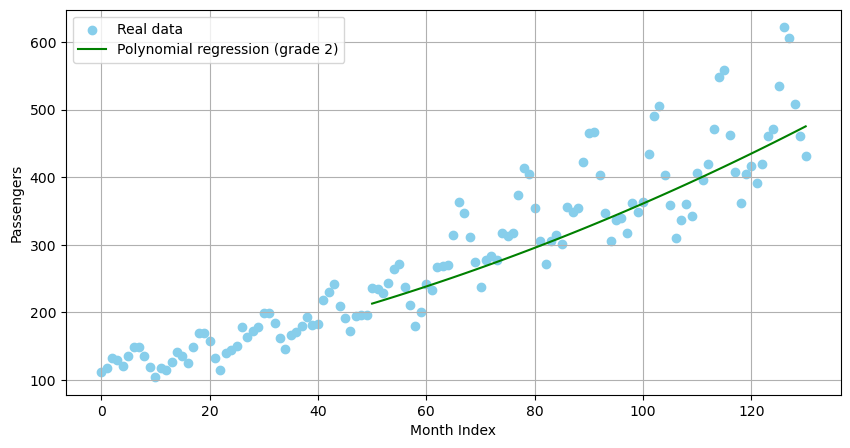

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error

df = pd.read_csv("data.csv")
df = df.dropna()
df["mese_numerico"] = range(len(df))

X = df["mese_numerico"].values.reshape(-1,1)
y = df["passengers"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=50, shuffle=False)

model_poly = make_pipeline(PolynomialFeatures(2), LinearRegression())
model_poly.fit(X_train, y_train)
y_pred_poly = model_poly.predict(X_test)

mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = root_mean_squared_error(y_test, y_pred_poly)
print(f"MAE: {mae_poly}\nRMSE:{rmse_poly}")

plt.figure(figsize=(10,5))
plt.scatter(X, y, label="Real data", color="skyblue")
plt.plot(X_test, y_pred_poly, label=f"Polynomial regression (grade 2)", color="green")
plt.xlabel("Month Index")
plt.ylabel("Passengers")
plt.legend()
plt.grid(True)
plt.show()

### Es2. 
Costruisci una web app con Dash che permette all’utente di scegliere il grado del polinomio per adattare un modello di regressione ai dati non lineari e vedere il risultato aggiornarsi dinamicamente.


1. Genera 100 punti x tra -3 e 3.

2. Calcola ad esempio y = x³ - x + rumore.

3. Costruisci un'interfaccia Dash con:
    - uno slider per scegliere il grado del polinomio (1–10),
    - un grafico Plotly che mostra i dati e la curva stimata.

4. Usa PolynomialFeatures + LinearRegression da scikit-learn per stimare la curva

In [4]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import numpy as np

x = np.linspace(-3,3,100)
rumore = np.random.normal(0, 1, size=x.shape)
y = x**3 - x + rumore

X = x.reshape(-1,1)

app = dash.Dash(__name__)
app.layout = html.Div([
    html.H3("Scegli il grado del polinomio"),

    dcc.Slider(
        id='slider-grado',
        min=1,
        max=10,
        step=1,
        value=2,
        marks={i: str(i) for i in range(1, 11)}
    ),

    dcc.Graph(id='output-grafico')
])

@app.callback(
    Output('output-grafico', 'figure'),
    [Input('slider-grado', 'value')]
)

def aggiorna_grafico(grado):
    model = make_pipeline(PolynomialFeatures(grado), LinearRegression())
    model.fit(X, y)
    y_pred = model.predict(X)

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name='Dati'))
    fig.add_trace(go.Scatter(x=x, y=y_pred, mode='lines', name='Polinomiale'))
    fig.update_layout(title='Regressione Polinomiale')
    
    return fig
    

if __name__ == '__main__':
    app.run_server(debug=True, port=8051) #ho cambiato porta perché altrimenti non mi lasciava eseguire